Jonah Berman  
Raunak Hota  
Abbas Paryavi  
Kyle Stanfield  
Armando Taveras  


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn import neural_network
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

In [127]:
df = pd.read_csv('./data/data/games_formated_07_20.csv')


In [ ]:
cols = list(df)


In [129]:
# the refined 3-game-history data features that we will use to 
# predict HOME_TEAM_WINS
refined_df3 = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',                 
 'WIN_PRCT_home_3g',
 'PTS_home_3g',
 'FG_PCT_home_3g',
 'FT_PCT_home_3g',
 'FG3_PCT_home_3g',
 'AST_home_3g',
 'REB_home_3g',
 'HOME_TEAM_WINS']]
# second set of data will use 10-game history, for greater balance against
# short term wins/losses, but flatter predictions 
# e.g. should not predict as well on a short win streak if using 10 games

In [130]:
refined_df3

,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_away,WIN_PRCT_home_3g,PTS_home_3g,FG_PCT_home_3g,FT_PCT_home_3g,FG3_PCT_home_3g,AST_home_3g,REB_home_3g,HOME_TEAM_WINS
0,0.293,0.292683,0.414634,0.333333,88.666667,0.440667,0.778333,0.290667,18.000000,38.666667,1
1,0.488,0.609756,0.292683,0.000000,86.666667,0.449333,0.612667,0.333333,18.000000,40.666667,0
2,0.646,0.634146,0.414634,0.000000,92.000000,0.399000,0.808333,0.225333,16.666667,39.333333,1
3,0.610,0.731707,0.365854,0.000000,82.000000,0.385000,0.692000,0.281333,19.000000,44.000000,0
4,0.341,0.439024,0.439024,0.333333,96.666667,0.461333,0.686333,0.424000,23.333333,35.666667,1
...,...,...,...,...,...,...,...,...,...,...,...
17917,0.603,0.805556,0.750000,0.333333,112.333333,0.499000,0.848000,0.400667,27.333333,37.666667,1
17918,0.603,0.805556,0.750000,0.333333,109.000000,0.482333,0.870333,0.358000,25.666667,36.666667,0
17919,0.732,0.714286,0.405405,0.666667,110.000000,0.459333,0.734667,0.344000,26.666667,43.000000,0
17920,0.603,0.805556,0.750000,0.666667,107.333333,0.466000,0.892000,0.373667,23.000000,37.000000,0


In [131]:
(X3_train, X3_test, y3_train, y3_test) = train_test_split(refined_df3.loc[:, ~refined_df3.columns.isin(['HOME_TEAM_WINS'])], refined_df3.loc[:, refined_df3.columns.isin(['HOME_TEAM_WINS'])], test_size=.2)

***
# Multi-Layer Perceptron Regression (3 Games)

In [132]:
# logistic regression inside MLP should output probabilities
# example of effects of altering the activation and optimization functions
# to serve different purposes
g3_regress = neural_network.MLPRegressor()
g3_regress.fit(X3_train, np.ravel(y3_train))
g3_predicted = g3_regress.predict(X3_test)

In [133]:
flaty3_test = y3_test.values.flatten()

In [134]:
g3_loss = (np.dot(np.subtract(g3_predicted, flaty3_test), np.subtract(g3_predicted, flaty3_test)))/len(g3_predicted)

In [135]:
1 - g3_loss

0.783846197741369

The multi-layer perceptron regressions we use in this project will use relU for activation and adam for optimization. 

***

# Multi-Layer Perceptron Classifier (3 Games)

In [136]:
# classifier for binary yes/no on Home team win
# example of discrete instead of continuous data or probability,
# binary instead of multiclass prediction
g3_class = neural_network.MLPClassifier()
g3_class.fit(X3_train, np.ravel(y3_train))
g3_class_predicted = g3_class.predict(X3_test)

In [137]:
g3_class_loss = (np.dot(np.subtract(g3_class_predicted, flaty3_test), np.subtract(g3_class_predicted, flaty3_test)))/len(g3_class_predicted)

In [138]:
1 - g3_class_loss

0.6181311018131102

In [139]:
flaty3_train = y3_train.values.flatten()

In [140]:
# checking predictions on training data when given training set 
# instead of train to test 
# should perform better
g3_class_predict_train = g3_class.predict(X3_train)

In [141]:
sk.metrics.accuracy_score(g3_class_predict_train, flaty3_train)

0.6199344353769966

***
# Multi-Layer Perceptron Regression (10 games)

In [228]:
# using past 10 game data. as mentioned before, flatter predictions
# but more data to pull from per prediction, resilient to short 
# win or loss streaks
refined_df10 = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',                 
 'WIN_PRCT_home_10g',
 'PTS_home_10g',
 'FG_PCT_home_10g',
 'FT_PCT_home_10g',
 'FG3_PCT_home_10g',
 'AST_home_10g',
 'REB_home_10g',
 'HOME_TEAM_WINS']]

In [143]:
# 80-20 split, good example of standard randomized split
(X10_train, X10_test, y10_train, y10_test) = train_test_split(refined_df10.loc[:, ~refined_df10.columns.isin(['HOME_TEAM_WINS'])], refined_df10.loc[:, refined_df10.columns.isin(['HOME_TEAM_WINS'])], test_size=.2)

In [144]:
%%capture --no-display
g10_regress = neural_network.MLPRegressor()
# dont use ravel() here or it messes up the loss curve graphed below.
g10_regress.fit(X10_train, y10_train)
g10_predicted = g10_regress.predict(X10_test)

In [145]:
# redundant flattening instead of ravel, but the variable names are here to stay 
flaty10_test = y10_test.values.flatten()
flaty10_train = np.ravel(y10_train)

In [146]:
# manual loss calculation 
g10_loss = (np.dot(np.subtract(g10_predicted, flaty10_test), np.subtract(g10_predicted, flaty10_test)))/len(g10_predicted)

In [147]:
# manual accuracy.
1 - g10_loss

0.744366484295351

***
# Multi-Layer Perceptron Classifier (10 Games)

In [218]:
# binary classifier for the yes/no of home team winning 
%%capture --no-display
g10_class = neural_network.MLPClassifier()
g10_class.fit(X10_train, np.ravel(y10_train))
g10_class_predicted = g10_class.predict(X10_test)

In [219]:
g10_class_loss = (np.dot(np.subtract(g10_class_predicted, flaty10_test), np.subtract(g10_class_predicted, flaty10_test)))/len(g10_class_predicted)

In [220]:
1 - g10_class_loss

0.6482566248256625

In [221]:
# redundant with np.ravel() but retains var names
# refactoring would be necessary for refining 
flaty10_train = y10_train.values.flatten()

In [222]:
# checking predictions when given the entire training set
# to predict training values
g10_class_predict_train = g10_class.predict(X10_train)

In [223]:
sk.metrics.accuracy_score(g10_class_predict_train, flaty10_train)

0.6498570133221734

## Confusion Matrices

In [224]:
# generating confusion matrices for 3 and 10-game histories 
cm3 = confusion_matrix(flaty3_test, g3_class_predicted, normalize="true")
cm10 = confusion_matrix(flaty10_test, g10_class_predicted, normalize="true")

Text(0.5, 1.0, '10 Game History')

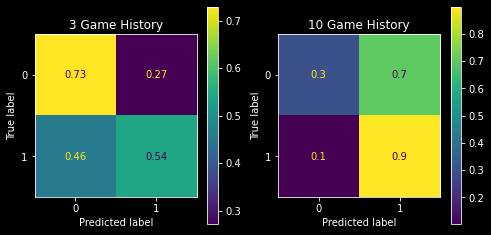

In [225]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

cm3_disp = ConfusionMatrixDisplay(cm3).plot(ax=ax1)
ax1.set_title("3 Game History")
cm10_disp = ConfusionMatrixDisplay(cm10).plot(ax=ax2)
ax2.set_title("10 Game History")

## Plotting the Regression

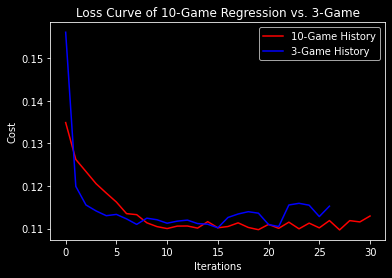

In [155]:
plt.style.use('dark_background')
# plotting the loss curves of both 3-game-history and 10-game-history
# loss curve plots loss at each iteration, not cumulative. 
g10_line, = plt.plot(g10_regress.loss_curve_[1:], color='r')
g3_line, = plt.plot(g3_regress.loss_curve_[1:], color='b')
plt.title("Loss Curve of 10-Game Regression vs. 3-Game")
plt.xlabel('Iterations')
plt.ylabel('Cost')
g10_line.set_label("10-Game History")
g3_line.set_label("3-Game History")
plt.legend()
plt.show()


In [156]:
plt.figure(30)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

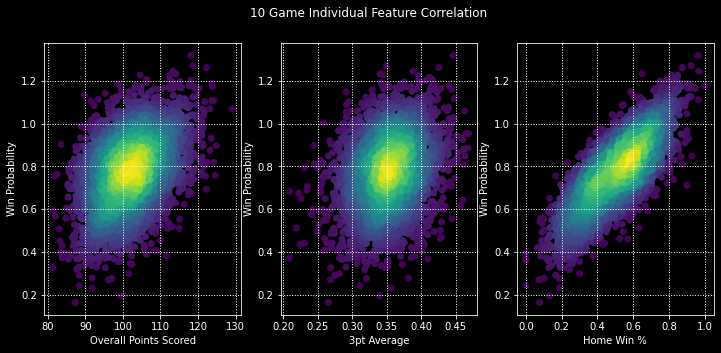

In [157]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# home points
# This prepend blurb allows coloration by density 
hpts = np.vstack([X10_test['PTS_home_10g'], g10_predicted])
hpts_z = gaussian_kde(hpts)(hpts)
# scatterplot 1
ax1.scatter(X10_test['PTS_home_10g'], g10_predicted, c=hpts_z)
ax1.grid(linestyle='dotted', linewidth=1.0)
ax1.set_xlabel("Overall Points Scored")
ax1.set_ylabel("Win Probability")

# 3-point percentage
pts3 = np.vstack([X10_test['FG3_PCT_home_10g'], g10_predicted])
pts3_z = gaussian_kde(pts3)(pts3)
# scatterplot 2
ax2.scatter(X10_test['FG3_PCT_home_10g'], g10_predicted, c=pts3_z)
ax2.grid(linestyle='dotted', linewidth=1.0)
ax2.set_xlabel("3pt Average")
ax2.set_ylabel("Win Probability")

# win percentage
wpct = np.vstack([X10_test['W_PCT_home'], g10_predicted])
wpct_z = gaussian_kde(wpct)(wpct)
# scatterplot 3
ax3.scatter(X10_test['W_PCT_home'], g10_predicted, c=wpct_z)
ax3.grid(linestyle='dotted', linewidth=1.0)
ax3.set_xlabel("Home Win %")
ax3.set_ylabel("Win Probability")

fig.suptitle("10 Game Individual Feature Correlation")
plt.show(30)

# Train-Test on Date-Split Data


In [160]:
# this dataframe uses both 3 and 10-game prior data
# also adds the number of games played so far. potential benefits include
# a team pushing harder toward the end of a season, or having a strong start
# 
# using both 3 and 10-game history should be able to weigh importance 
# of long-term patterns while also reacting to quick streaks
date_df = df[['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_away',
 'G_home',  
 'PTS_home_3g',
 'FG_PCT_home_3g',
 'FT_PCT_home_3g',
 'FG3_PCT_home_3g',
 'AST_home_3g',
 'REB_home_3g',
 'WIN_PRCT_away_3g',
 'PTS_away_3g',
 'FG_PCT_away_3g',
 'FT_PCT_away_3g',
 'FG3_PCT_away_3g',
 'AST_away_3g',
 'REB_away_3g',
 'WIN_PRCT_home_10g',
 'PTS_home_10g',
 'FG_PCT_home_10g',
 'FT_PCT_home_10g',
 'FG3_PCT_home_10g',
 'AST_home_10g',
 'REB_home_10g',
 'WIN_PRCT_away_10g',
 'PTS_away_10g',
 'FG_PCT_away_10g',
 'FT_PCT_away_10g',
 'FG3_PCT_away_10g',
 'AST_away_10g',
 'REB_away_10g',
 'SEASON',
 'HOME_TEAM_WINS']]

In [161]:
# splitting datewise rather than randomly with train_test_split
date_train = date_df[date_df['SEASON'] < 2018]
date_test = date_df[date_df['SEASON'] >= 2018]

In [162]:
# xd, yd = x-date, y-date
# both = both 3 and 10-game input features
xdboth_train = date_train.loc[:, ~date_train.columns.isin(['HOME_TEAM_WINS'])]
ydboth_train = date_train.loc[:, date_train.columns.isin(['HOME_TEAM_WINS'])]

xdboth_test = date_test.loc[:, ~date_test.columns.isin(['HOME_TEAM_WINS'])]
ydboth_test = date_test.loc[:, date_test.columns.isin(['HOME_TEAM_WINS'])]             

## MLP Regression

In [168]:
# familiar regression, not tuned specifically for this data
# uses relU and adam for activation and optimization, respectively 
dateboth_regress = neural_network.MLPRegressor()
dateboth_regress.fit(xdboth_train, np.ravel(ydboth_train))
dateboth_predicted = dateboth_regress.predict(xdboth_test)

In [195]:
dateboth_regress.loss_

0.16518498329888734

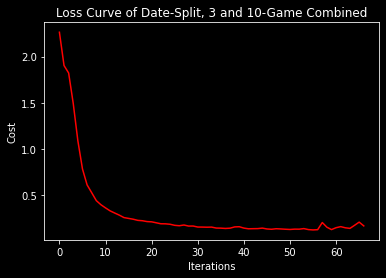

In [199]:
# creating loss curve to demonstrate loss at every iteration
plt.style.use('dark_background')
g10_line, = plt.plot(dateboth_regress.loss_curve_[1:], color='r')

plt.title("Loss Curve of Date-Split, 3 and 10-Game Combined")
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()


In [173]:
plt.figure(20)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## MLP Classifier

In [215]:
# combined classifier
%%capture --no-display
dateboth_class = neural_network.MLPClassifier()
dateboth_class.fit(xdboth_train, np.ravel(ydboth_train))
dateboth_class_predicted = dateboth_class.predict(xdboth_test)

In [216]:
cmdboth = confusion_matrix(ydboth_test, dateboth_class_predicted, normalize="true")

Text(0.5, 1.0, 'Confusion Matrix, 3 and 10-Game Combined')

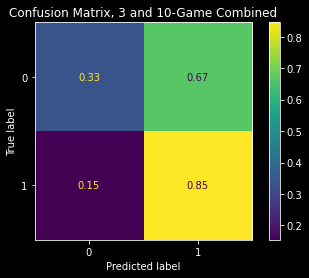

In [217]:
cmdboth_disp = ConfusionMatrixDisplay(cmdboth).plot()
plt.title("Confusion Matrix, 3 and 10-Game Combined")